<a href="https://colab.research.google.com/github/Akshayc10/Data-Science-Portfolio/blob/master/Stock_Market_Prediction_using_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Collection

In [ ]:
#Get the stock quote 
#Import the libraries
import math
import warnings
warnings.filterwarnings('ignore')
import itertools
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
df = web.DataReader('AAPL', data_source='yahoo', start='2015-07-08', end='2020-07-02')
 
import pandas as pd


#Show the data 
df

Using TensorFlow backend.


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-07-08,124.639999,122.540001,124.480003,122.570000,60761600.0,112.961594
2015-07-09,124.059998,119.220001,123.849998,120.070000,78595000.0,110.657570
2015-07-10,123.849998,121.209999,121.940002,123.279999,61354500.0,113.615921
2015-07-13,125.760002,124.320000,125.029999,125.660004,41440500.0,115.809349
2015-07-14,126.370003,125.040001,126.040001,125.610001,31768100.0,115.763260
...,...,...,...,...,...,...
2020-06-26,365.320007,353.019989,364.410004,353.630005,51314200.0,353.630005
2020-06-29,362.170013,351.279999,353.250000,361.779999,32661500.0,361.779999
2020-06-30,365.980011,360.000000,360.079987,364.799988,35055800.0,364.799988


In [ ]:
df.columns

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')

In [ ]:
df.shape


(1257, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1257 entries, 2015-07-08 to 2020-07-02
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       1257 non-null   float64
 1   Low        1257 non-null   float64
 2   Open       1257 non-null   float64
 3   Close      1257 non-null   float64
 4   Volume     1257 non-null   float64
 5   Adj Close  1257 non-null   float64
dtypes: float64(6)
memory usage: 68.7 KB


In [ ]:
#Import the libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6

Create a graph to visualize the data.

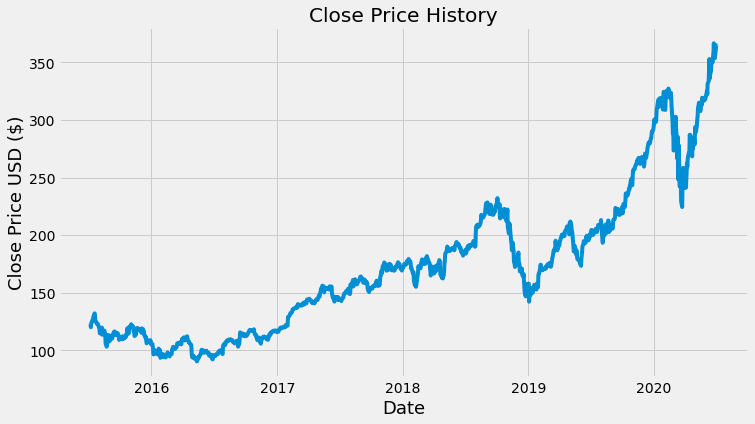

In [ ]:
#Visualize the closing price history
plt.figure(figsize=(11,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.show()

In [ ]:
#Create a new dataframe with only the 'Close' column
df1 = df.filter(['Close'])
#Converting the dataframe to a numpy array
dataset = df1.values
dataset

array([[122.56999969],
       [120.06999969],
       [123.27999878],
       ...,
       [364.79998779],
       [364.10998535],
       [364.10998535]])

In [ ]:
df1

,Close
Date,
2015-07-08,122.570000
2015-07-09,120.070000
2015-07-10,123.279999
2015-07-13,125.660004
2015-07-14,125.610001
...,...
2020-06-26,353.630005
2020-06-29,361.779999
2020-06-30,364.799988


In [ ]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [ ]:
df1
print(df1)

[[0.11669504]
 [0.1076433 ]
 [0.11926573]
 ...
 [0.99373616]
 [0.99123787]
 [0.99123787]]


Splitting Dataset into train and test

In [ ]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [ ]:
training_size,test_size

(817, 440)

In [ ]:
train_data

array([[0.11669504],
       [0.1076433 ],
       [0.11926573],
       [0.127883  ],
       [0.12770196],
       [0.132083  ],
       [0.13820195],
       [0.14222093],
       [0.15109168],
       [0.14631233],
       [0.12628989],
       [0.12607266],
       [0.12368298],
       [0.11741917],
       [0.11962779],
       [0.11821573],
       [0.11597091],
       [0.11209677],
       [0.10174158],
       [0.08798292],
       [0.09073466],
       [0.08975705],
       [0.09116912],
       [0.10637606],
       [0.08381911],
       [0.09015533],
       [0.08982948],
       [0.09276224],
       [0.09710709],
       [0.09471742],
       [0.08932259],
       [0.08077774],
       [0.05583115],
       [0.04627252],
       [0.04851733],
       [0.07006049],
       [0.08175532],
       [0.08309499],
       [0.08117602],
       [0.06292771],
       [0.07965531],
       [0.07252256],
       [0.06853977],
       [0.07954669],
       [0.071726  ],
       [0.08048808],
       [0.08642602],
       [0.090

In [ ]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [ ]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [ ]:
print(X_test.shape), print(ytest.shape)

(339, 100)
(339,)


(None, None)

Create the Stacked LSTM model

In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 3s 261ms/step - loss: 0.0134 - val_loss: 0.0512
Epoch 2/100
12/12 [==============================] - 2s 184ms/step - loss: 0.0024 - val_loss: 0.0038
Epoch 3/100
12/12 [==============================] - 2s 188ms/step - loss: 8.1477e-04 - val_loss: 0.0052
Epoch 4/100
12/12 [==============================] - 2s 182ms/step - loss: 5.4155e-04 - val_loss: 0.0031
Epoch 5/100
12/12 [==============================] - 2s 186ms/step - loss: 5.0524e-04 - val_loss: 0.0032
Epoch 6/100
12/12 [==============================] - 2s 185ms/step - loss: 4.6299e-04 - val_loss: 0.0030
Epoch 7/100
12/12 [==============================] - 2s 194ms/step - loss: 4.3863e-04 - val_loss: 0.0030
Epoch 8/100
12/12 [==============================] - 2s 182ms/step - loss: 4.1749e-04 - val_loss: 0.0033
Epoch 9/100
12/12 [==============================] - 2s 199ms/step - loss: 4.2139e-04 - val_loss: 0.0032
Epoch 10/100
12/12 [==============================] - 2s 207ms/

Prediction

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.2.0'

In [ ]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [ ]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

145.67347299084346

In [ ]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

249.0443271008429

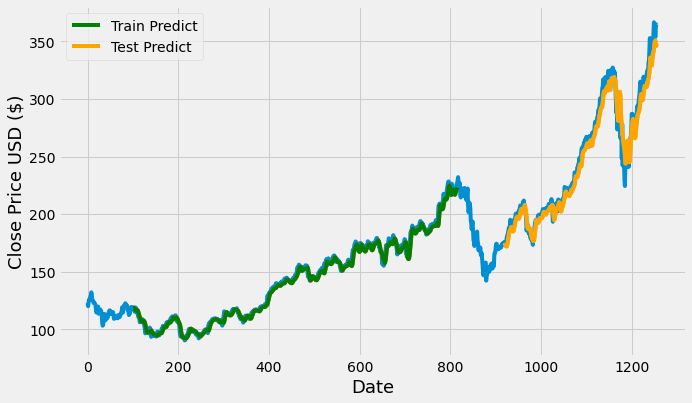

In [ ]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(trainPredictPlot, color = 'Green', label='Train Predict')
plt.plot(testPredictPlot)
plt.plot(testPredictPlot, color = 'Orange', label='Test Predict')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.legend()
plt.show()


In [ ]:

len(test_data)

440

In [ ]:
test_predict

array([[172.86351],
       [172.9638 ],
       [172.93216],
       [173.09312],
       [173.31992],
       [173.30054],
       [172.66713],
       [171.8414 ],
       [172.41193],
       [174.4051 ],
       [177.00003],
       [179.66002],
       [182.16855],
       [184.37366],
       [185.5102 ],
       [185.95226],
       [187.45598],
       [188.59222],
       [188.4773 ],
       [187.07965],
       [185.67326],
       [184.8989 ],
       [185.10176],
       [186.21559],
       [188.25415],
       [190.68533],
       [192.77208],
       [194.33269],
       [195.87839],
       [196.95491],
       [197.6548 ],
       [197.5602 ],
       [196.94107],
       [196.30891],
       [195.9351 ],
       [196.78448],
       [198.4788 ],
       [200.36612],
       [202.50656],
       [204.19022],
       [204.6241 ],
       [203.88077],
       [202.75824],
       [200.91435],
       [201.46545],
       [203.40576],
       [206.14896],
       [207.7621 ],
       [206.67569],
       [204.15988],


In [ ]:
train_predict

array([[118.74542 ],
       [118.80143 ],
       [118.572655],
       [118.107605],
       [117.40925 ],
       [116.500984],
       [116.12879 ],
       [116.235275],
       [116.62115 ],
       [116.716484],
       [116.55015 ],
       [115.82909 ],
       [114.688675],
       [113.19991 ],
       [111.83085 ],
       [110.52632 ],
       [109.03765 ],
       [107.74302 ],
       [106.83469 ],
       [106.536385],
       [106.668625],
       [106.86937 ],
       [107.248535],
       [107.54518 ],
       [107.41329 ],
       [106.93531 ],
       [105.97231 ],
       [104.52137 ],
       [102.40154 ],
       [100.12657 ],
       [ 98.35653 ],
       [ 97.487175],
       [ 97.12728 ],
       [ 97.302345],
       [ 97.546936],
       [ 97.62963 ],
       [ 97.55166 ],
       [ 97.32354 ],
       [ 97.635376],
       [ 98.2404  ],
       [ 98.96285 ],
       [ 98.8369  ],
       [ 97.960266],
       [ 97.09926 ],
       [ 96.46064 ],
       [ 95.87151 ],
       [ 95.54873 ],
       [ 95.5

In [ ]:
x_input=test_data[340:].reshape(1,-1)
x_input.shape

(1, 100)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
temp_input

[0.8301169013614516,
 0.8575980802179488,
 0.849161796973634,
 0.8494515145200203,
 0.8279083299208834,
 0.8446359271414514,
 0.8326151903484058,
 0.8063651453217466,
 0.7525254154772816,
 0.7159563651342722,
 0.7325029717595004,
 0.6632390421685987,
 0.6626597175706952,
 0.7548064715518805,
 0.7204461031443083,
 0.7690357797854941,
 0.7334806303599679,
 0.7193960704046787,
 0.6366270159512601,
 0.7060356938204861,
 0.670154584531558,
 0.5716716680327516,
 0.6793511829691166,
 0.5498751186991129,
 0.5884355075703349,
 0.5660233913217771,
 0.5591802783454145,
 0.5029146889005915,
 0.4852818624661526,
 0.5667837617624549,
 0.561859613175143,
 0.6086389971308901,
 0.569897562416894,
 0.5954958534590529,
 0.5936130761395833,
 0.545168203024156,
 0.5597233606263026,
 0.5469785509570291,
 0.6232303970500521,
 0.6122234506796207,
 0.6362649242657119,
 0.6432165984508178,
 0.6622614940630001,
 0.7122270528123487,
 0.7027408473232728,
 0.710923655338217,
 0.6968390953829278,
 0.6755856283301773

In [ ]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<10):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

0 day input [0.83491939 0.83391255 0.83287966 0.83176619 0.83054054 0.8291949
 0.82774317 0.8262139  0.82464588 0.82307845 0.82154739 0.82007873
 0.81868714 0.81737518 0.81613541 0.8149519  0.81380534 0.81267494
 0.81154317 0.81039613 0.80922693 0.80803353 0.8068198  0.80559331
 0.80436355 0.80314058 0.80193263 0.80074626 0.7995851  0.79844922
 0.79733688 0.79624361 0.79516512 0.79409528 0.79303068 0.79196721
 0.79090309 0.78983784 0.78877264 0.78770888 0.78664917 0.78559589
 0.78455102 0.78351617 0.7824921  0.78147918 0.78047675 0.77948356
 0.77849889 0.77752078 0.77654845 0.77558059 0.77461672 0.77365702
 0.77270108 0.77174962 0.77080303 0.76986188 0.76892692 0.7679981
 0.7670759  0.76616007 0.7652508  0.76434773 0.76345044 0.76255852
 0.76167154 0.76078928 0.75991142 0.75903821 0.75816888 0.75730437
 0.7564438  0.75558805 0.75473684 0.75389034 0.75304866 0.75221169
 0.75137901 0.75055128 0.74972785 0.74890858 0.74809343 0.74728245
 0.7464754  0.74567217 0.74487275 0.74407703 0.74328

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [ ]:
len(df1)

1257

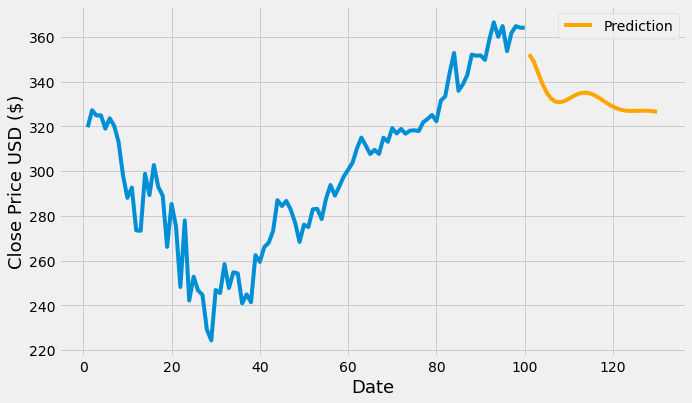

In [ ]:
plt.plot(day_new,scaler.inverse_transform(df1[1157:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output), color = 'orange', label='Prediction')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.legend()
plt.show()

No handles with labels found to put in legend.


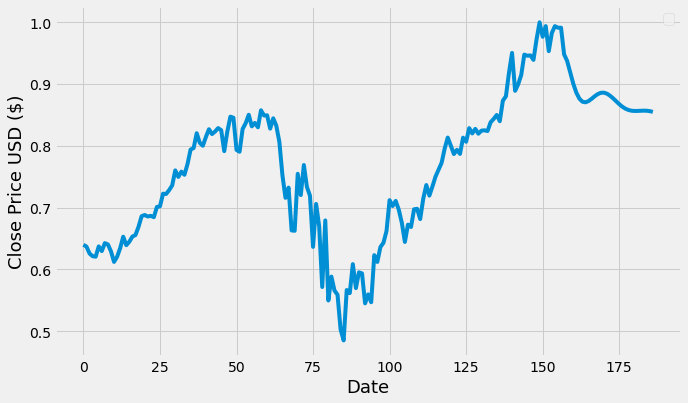

In [ ]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1100:])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.legend()
plt.show()

In [ ]:
df3=scaler.inverse_transform(df3).tolist()

No handles with labels found to put in legend.


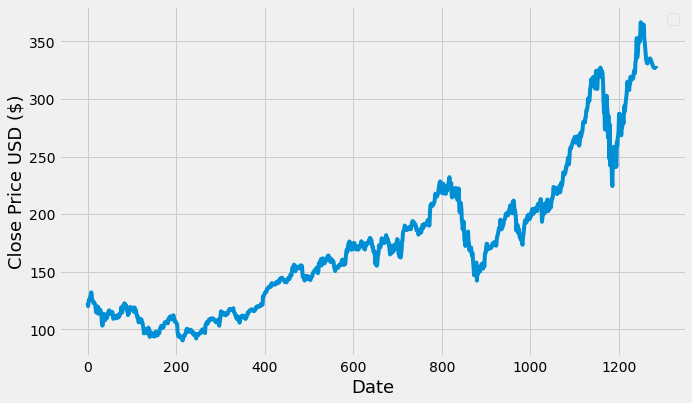

In [ ]:
plt.plot(df3)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.legend()
plt.show()